In [1]:
from tdc.single_pred import ADME
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm
from noiseestimator import NoiseEstimator
import matplotlib.pyplot as plt

In [2]:
Casf2016 = pd.read_csv('../data/interim/Casf2016_R.csv', index_col=0)
Casf2016.columns = ['Casf2016']
BACE = pd.read_csv('../data/interim/BACE_roc_auc.csv', index_col=0)
BACE.columns = ['BACE']
bace_reg = pd.read_csv('../data/interim/BACE_RMSE.csv', index_col=0)
bace_reg.columns = ['bace_reg']
solubility = pd.read_csv('../data/interim/solubility_MAE.csv', index_col=0)
solubility.columns = ['solubility']
caco2 = pd.read_csv('../data/interim/Caco2_mae.csv', index_col=0)
caco2.columns = ['caco2']
rzepiela = pd.read_csv('../data/interim/rzepiela_r2.csv', index_col=0)
rzepiela.columns = ['rzepiela']
lipophilicity = pd.read_csv('../data/interim/lipophilicity_mae.csv', index_col=0)
lipophilicity.columns = ['lipophilicity']
matbench_expt_gap = pd.read_csv('../data/interim/matbench_expt_gap_MAE.csv', index_col=0)
matbench_expt_gap.columns = ['matbench_expt_gap']
rxn_buchwald = pd.read_csv('../data/interim/rxn_Buchwald_r2.csv')
rxn_buchwald.columns = ['rxn_buchwald']

data_1 = pd.concat((Casf2016.Casf2016, rzepiela.rzepiela, rxn_buchwald, BACE.BACE), axis=1).melt()
data_2 = pd.concat([bace_reg.bace_reg, solubility.solubility, lipophilicity.lipophilicity, caco2.caco2, matbench_expt_gap.matbench_expt_gap], axis=1).melt()

max_values_1 = {
    'Casf2016': 0.953334,
    'rzepiela': 0.800032,
    'rxn_buchwald': 0.962277,
    }
max_values_2 = {
    'bace_reg': 0.689253,
    'solubility': 0.446859,
    'caco2': 0.335229,
    'lipophilicity': 0.271119,
    'matbench_expt_gap': 0.111706,
}

ML_1 = {'Casf2016': [0.845],
        'rzepiela': [0.81,0.77],
        'BACE': [0.86],
        'rxn_buchwald': [0.95]}

ML_2 = {'bace_reg': [1.32], 
        'solubility': [0.76], 
        'lipophilicity': [0.47], 
        'caco2': [0.27], 
        'matbench_expt_gap': [0.29]}

x_labels = ['CASF2016\n(Pearson R)',
            'Rzepiela\n($r^2$)', 
            'Buchwald\n($r^2$)',
            'BACE-c\n(ROC-AUC)', 
            'BACE-r\n(RMSE)', 
            'AqSolDB\n(MAE)', 
            'Lipophilicity\n(MAE)', 
            'Caco-2\n(MAE)', 
            'Matbench\nExpt. Gap\n(MAE)']

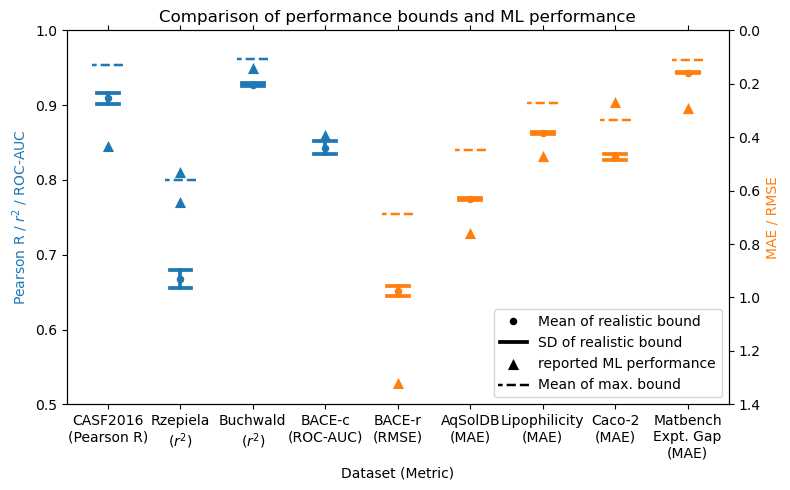

In [3]:
# Make a violin plot of the ROC AUC scores for the BACE dataset
fig, ax1 = plt.subplots(figsize=(8, 5))
# create the second axes sharing the x-axis with ax1, for MAE / RMSE
ax2 = ax1.twinx()

sns.pointplot(data=data_1, x='variable', y='value', ax=ax1, color='tab:blue', capsize=.3, errorbar=('sd'), linestyles='none', marker='.')
sns.stripplot(ML_1, color='tab:blue', ax=ax1, jitter=False, marker='^', s=8)

sns.pointplot(data=data_2, x='variable', y='value', ax=ax2, color='tab:orange', capsize=.3, linestyle='none', errorbar='sd', marker='.') # , inner=None
sns.stripplot(ML_2, color='tab:orange', ax=ax2, jitter=False, marker='^', s=8)
ax1.set_xticklabels(x_labels)
# axes bounds etc
ax1.set_ylim(0.5, 1)
ax1.set_ylabel('Pearson R / $r^2$ / ROC-AUC', color='tab:blue')
# also plot x axis ticks at the top, but keep the bottom ones
ax1.tick_params(axis='x', top=True, bottom=True)
ax2.set_ylim(1.4, 0)
ax2.set_ylabel('MAE / RMSE', color='tab:orange')
ax1.set_xlabel('Dataset (Metric)')
# title
plt.title('Comparison of performance bounds and ML performance')
sns.scatterplot(data=max_values_1, ax=ax1, color='tab:blue', marker='_', s=500, linestyle='--')
sns.scatterplot(data=max_values_2, ax=ax2, color='tab:orange', marker='_', s=500, linestyle='--')

# add the legend
ax2.legend(['Mean of realistic bound', 'SD of realistic bound'] + ['_a']*8 + ['reported ML performance'] + ['Mean of max. bound'], loc='lower right')
leg = ax2.get_legend()
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_color('black')
leg.legendHandles[2].set_color('black')
leg.legendHandles[3].set_color('black')
fig.tight_layout()
fig.savefig('../reports/ML_vs_bounds.svg')